# Analyze the correlation between features and response
Since the trained statistical models did not meet our expectatoins regarding establishing a meaningful association between the TF affinity scores as features and gene expression as response, we decided to take a deeper look at the link(s) between these two quantities.

## Load the feature data

In [1]:
load("../TF_promoter.RData")

In [2]:
print(ls())

[1] "full.x" "x"     


The **full.x** variable contains the unfiltered samples (genes), wherease the **x** has only those that survived the gene expression variance filtering explained in [iPCs data and tree-guided MTL results notebook](https://github.com/fba67/scMTL/blob/master/sc_iPCs.ipynb). I decided to include the full gene set as well to assure that this lack of association we've observed between the features and responses wasn't due to any other preprocessing steps.

In [3]:
print(dim(full.x))
print(dim(x))

[1] 56984   726
[1] 13906   464


## Print the range of data
The features data are log-transformed before hand when dumped into the RData file.

In [4]:
print(range(x))
print(range(full.x))

[1] 0.0000000 0.7455161
[1] 0.000000 1.143897


## Types of gene expression measurements (response)
We had initiated the problem by approaching the single cell gene expression as the responses. However, we decided to look into the bulk RNA-seq available for the same cell types provided by Kathrin. Here, we're goining to investigate their correlation with features for both single cell and bulk measurements of gene expression.

* [Single cell gene expression](#sc)
* [Bulk gene expression](#bulk)

# Single cell gene expression <a class= "anchor" id= "SC"></a>

## Read the response (imputed sc gene expression)

In [5]:
full.y <- read.csv("/MMCI/MS/ExpRegulation/work/data/singleCell/iPCs_Kathrin/scImpute/StemNet_readCounts_Kclust2scimpute_count.csv")
y <- read.csv("../scMTL_StemNet_imputed_TPM_response_reduced_var.txt")

rownames(full.y) <- full.y$X
full.y <- full.y[, -1]

rownames(y) <- y$X
y <- y[, -1]

In [6]:
print(dim(full.y))
print(dim(y))

[1] 60525   657
[1] 13906   640


## Find the overlapping genes (full)

In [7]:
full.y.hits <- which(rownames(full.y) %in% rownames(full.x))
full.x.hits <- which(rownames(full.x) %in% rownames(full.y))
print(length(full.y.hits))
print(length(full.x.hits))

[1] 56984
[1] 56984


## Adjust the data variables based on the overlapping genes found above

In [8]:
full.y <- full.y[full.y.hits, ]
full.x <- full.x[full.x.hits, ]

## Log-transform the response data

In [9]:
#full.y <- log2(1 + full.y)
#y <- log2(1 + y)

In [10]:
print(range(full.y))
print(range(y))

[1]      0.0 601551.9
[1]    0.000 1290.793


## Compute the correlation between each feature and each response vector (gene expression profile per cell)

* [Correlations on full datasets](#full)
* [Correlations on filtered datasets](#filtered)

## Correlations on full datasets <a class= "anchor" id= "full"></a>

In [11]:
full.cors <- list()
for(i in seq(ncol(full.y)))
    full.cors[[i]] <- sapply(seq(ncol(full.x)), function(j)cor(full.x[, j], full.y[, i]))

## Print the range of the resulting correlation values for each cell

In [12]:
df.full <- data.frame(min= as.numeric(lapply(full.cors, FUN= min)), max= as.numeric(lapply(full.cors, FUN= max)))
rownames(df.full) <- colnames(full.y)
df.full[seq(50), ]

,min,max
HLC_CEL_c1_R1,-0.006165960,0.03256488
HLC_CEL_c10_R1,-0.006120833,0.01933611
HLC_CEL_c11_R1,-0.005838444,0.01583315
HLC_CEL_c13_R1,-0.006044120,0.02527474
HLC_CEL_c14_R1,-0.005164735,0.03449020
HLC_CEL_c15_R1,-0.005671424,0.02838456
HLC_CEL_c16_R1,-0.005489379,0.01651295
HLC_CEL_c17_R1,-0.006435344,0.02586855
HLC_CEL_c18_R1,-0.006590804,0.02408377
HLC_CEL_c19_R1,-0.007327192,0.02693308


## Plot histogram to have a more concise view of the correlation distributions

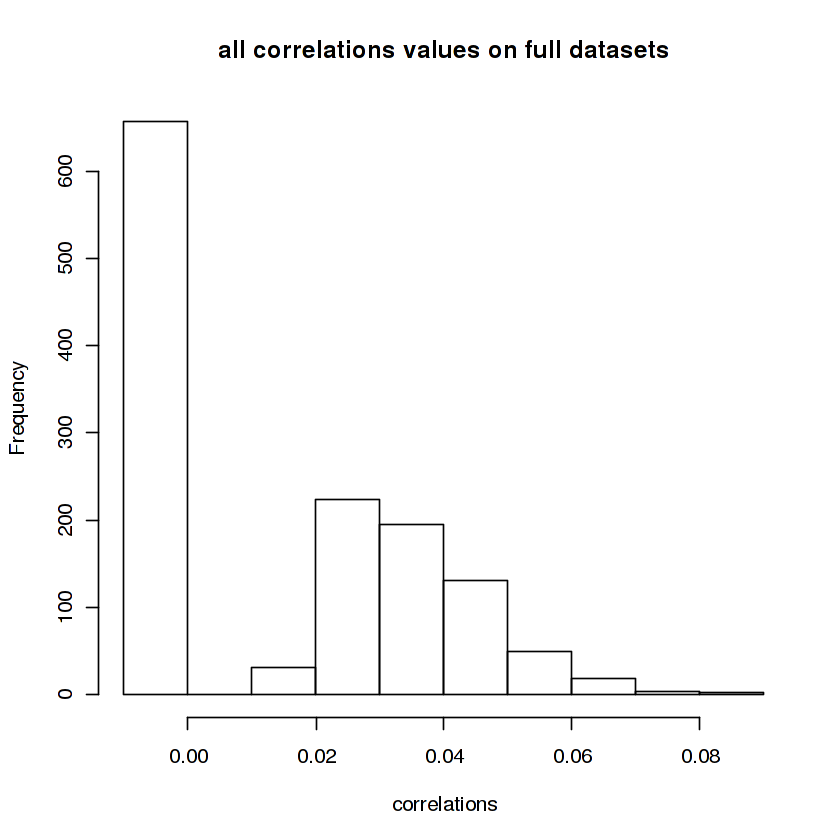

In [13]:
hist(as.matrix(df.full), main= "all correlations values on full datasets", xlab= "correlations")

## Correlations on filtered datasets <a class= "anchor" id= "filtered"></a>

In [14]:
cors <- list()
for(i in seq(ncol(y)))
    cors[[i]] <- sapply(seq(ncol(x)), function(j)cor(x[, j], y[, i]))

## Print the range of the resulting correlation values for each cell

In [15]:
df <- data.frame(min= as.numeric(lapply(full.cors, FUN= min)), max= as.numeric(lapply(full.cors, FUN= max)))
rownames(df) <- colnames(full.y)
df[seq(50), ]

,min,max
HLC_CEL_c1_R1,-0.006165960,0.03256488
HLC_CEL_c10_R1,-0.006120833,0.01933611
HLC_CEL_c11_R1,-0.005838444,0.01583315
HLC_CEL_c13_R1,-0.006044120,0.02527474
HLC_CEL_c14_R1,-0.005164735,0.03449020
HLC_CEL_c15_R1,-0.005671424,0.02838456
HLC_CEL_c16_R1,-0.005489379,0.01651295
HLC_CEL_c17_R1,-0.006435344,0.02586855
HLC_CEL_c18_R1,-0.006590804,0.02408377
HLC_CEL_c19_R1,-0.007327192,0.02693308


## Plot histogram to have a more concise view of the correlation distributions

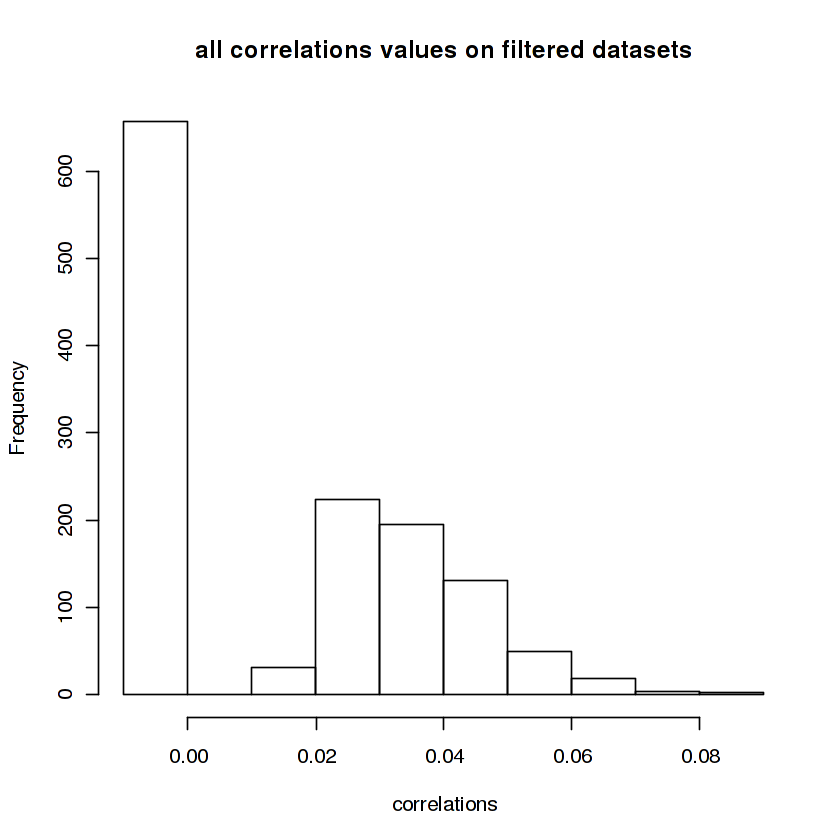

In [16]:
hist(as.matrix(df), main= "all correlations values on filtered datasets", xlab= "correlations")

# Bulk gene expression <a class= "anchor" id= "bulk"></a>

## Read the bulk expression data

In [17]:
bulk.rna <- read.table("/MMCI/MS/ExpRegulation/work/data/singleCell/iPCs_Kathrin/bulkRNAseq_TPM.txt")

In [18]:
head(bulk.rna)

,CEL_R1_HLC,CEL_R2_HLC,CEL_R3_HLC,CEL_R4_HLC,HAY_R1_HLC,X41_Hm09_LiHe_Ct_mRNA_K_1,X41_Hm16_LiHe_Ct_mRNA_K_1,X41_Hm25_LiHe_Ct_mRNA_K_1,X41_Hf02_LiHe_Ct_mRNA_K_1,X41_Hf03_LiHe_Ct_mRNA_K_1,X41_Hf11_LiHe_St_mRNA_K_1
ENSG00000000003,0.123475525,0.100259254,0.132327534,0.113930060,0.084870548,0.039032603,0.027029870,0.035091285,0.019787114,0.026876734,0.035469642
ENSG00000000005,0.002136035,0.001672469,0.002941051,0.001593308,0.000254386,0.000000000,0.000000000,0.000007400,0.000036900,0.000000000,0.000016500
ENSG00000000419,0.032598362,0.040563411,0.030860184,0.029191241,0.057034467,0.022158255,0.018852664,0.016677832,0.012805193,0.021156048,0.027470117
ENSG00000000457,0.003158375,0.002107327,0.003266896,0.002347738,0.003326685,0.005347895,0.003600676,0.003943967,0.002887764,0.004674096,0.004503143
ENSG00000000460,0.001548893,0.003096830,0.001865764,0.001467252,0.004737260,0.001567921,0.002211835,0.002083310,0.005569687,0.001236622,0.001642494
ENSG00000000938,0.000037700,0.000019300,0.000046000,0.000000000,0.000484569,0.000440349,0.000470467,0.000116471,0.002533583,0.000505462,0.000173824


## Load the feature data again

In [19]:
load("../TF_promoter.RData")

## Match the gene names between features and the bulk expression data

In [20]:
full.hits.bulk <- which(rownames(bulk.rna) %in% rownames(full.x))
full.hits.x <- which(rownames(full.x) %in% rownames(bulk.rna))

hits.bulk <- which(rownames(bulk.rna) %in% rownames(x))
hits.x <- which(rownames(x) %in% rownames(bulk.rna))

In [21]:
full.bulk <- bulk.rna[full.hits.bulk, ]
full.x <- full.x[full.hits.x, ]

bulk <- bulk.rna[hits.bulk, ]
x <- x[hits.x, ]

## Log-transform the bulk expressio data

In [22]:
#full.bulk <- log2(1 + full.bulk)
#bulk <- log2(1 + bulk)

In [23]:
print(dim(x))
print(dim(bulk))

[1] 13906   464
[1] 13906    11


## Correlations on full datasets

In [24]:
full.cors <- list()
for(i in seq(ncol(full.bulk)))
    full.cors[[i]] <- sapply(seq(ncol(full.x)), function(j)cor(full.x[, j], full.bulk[, i]))

In [25]:
df.full <- data.frame(min= as.numeric(lapply(full.cors, FUN= min)), max= as.numeric(lapply(full.cors, FUN= max)))
rownames(df.full) <- colnames(bulk.rna)
df.full

,min,max
CEL_R1_HLC,-0.007293076,0.02914770
CEL_R2_HLC,-0.007814113,0.02664177
CEL_R3_HLC,-0.007143958,0.02900459
CEL_R4_HLC,-0.007099288,0.02867980
HAY_R1_HLC,-0.007460354,0.02203603
X41_Hm09_LiHe_Ct_mRNA_K_1,-0.004996072,0.10419591
X41_Hm16_LiHe_Ct_mRNA_K_1,-0.004732263,0.10058969
X41_Hm25_LiHe_Ct_mRNA_K_1,-0.005019210,0.10632526
X41_Hf02_LiHe_Ct_mRNA_K_1,-0.006149377,0.04484551
X41_Hf03_LiHe_Ct_mRNA_K_1,-0.005639333,0.10373105


## Correlations on filtered datasets

In [26]:
cors <- list()
for(i in seq(ncol(bulk)))
    cors[[i]] <- sapply(seq(ncol(x)), function(j)cor(x[, j], bulk[, i]))

In [27]:
df <- data.frame(min= as.numeric(lapply(cors, FUN= min)), max= as.numeric(lapply(cors, FUN= max)))
rownames(df) <- colnames(bulk.rna)
df

,min,max
CEL_R1_HLC,-0.02356256,0.05728395
CEL_R2_HLC,-0.03600147,0.05091173
CEL_R3_HLC,-0.02233465,0.05943490
CEL_R4_HLC,-0.02084967,0.07831677
HAY_R1_HLC,-0.03584570,0.05904405
X41_Hm09_LiHe_Ct_mRNA_K_1,-0.01862383,0.19351724
X41_Hm16_LiHe_Ct_mRNA_K_1,-0.01822802,0.18668043
X41_Hm25_LiHe_Ct_mRNA_K_1,-0.01740111,0.19741334
X41_Hf02_LiHe_Ct_mRNA_K_1,-0.02561708,0.08807635
X41_Hf03_LiHe_Ct_mRNA_K_1,-0.01758692,0.19287735


# Conclusion
* The aim was to look for linear relationship between the TF binding affinity scores as features and single cell/bulk measurements of gene expression as response by computing the correlation between the two.
* The unfiltered (full) and filtered datasets were consideted to examine such associasions. However, none showed any descent correlation.
* There was not much to expect from the single cell data due to the inherent noise of low-coverage sequencing, however the bulk data should have had better results.
* It's worth noting that these static features are not perfect representitves of the transcription dynamics, therefore one should not expect good correlations, and therefore training a statistical model would have a better saying on the contributions of TFs in gene expression. The tree-guided MTL and neural networks trained on the single cells did not show any satisfactory results. However, I'll be testing neural networks on the bulk gene expression data to rule out any doubt with this regard.